# Electric Vehicles Data Analysis

The UK recently announced a ban on sales of petrol and diesel cars from 2030, a full decade earlier than planned, thus pushing forward EV consumption decisions.

Whilst EV popularity has been increasing over the last 5 years, simple datasets on the different EVs available in the market today is limited. 

The purpose of this analysis is to use Python for data frames manipulation, data wrangling and data visualisation. These exercises will help to compare and analyse EV models available and understand the relationship between rapid charging and prices.


# Data sources

Raw dataset:https://www.kaggle.com/geoffnel/evs-one-electric-vehicle-dataset (data source is ev-database.org/)



# Python packages used
pandas - dataframes manipulation and data wrangling
matplotlib - data visualisation and plotting


In [1]:
import pandas as pd #data processing
import numpy as np
import matplotlib.pyplot as plt #plotting



In [2]:
#create data frame
df=pd.read_csv('/Users/Pankhuri/PycharmProjects/Data/electric_cars_dataset.csv') 


In [3]:
#view the dataset - first 5 rows
df.head() 


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df.shape #gives an idea of the dimension of the dataset (rows,columns)

(103, 14)

In [5]:
df=df.drop(columns=['Seats','Segment'], axis=1) #data cleaning - drop columns not required for the analysis

In [6]:
#the top 5 most expensive cars
df.sort_values(['PriceEuro'], ascending=False)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,32997


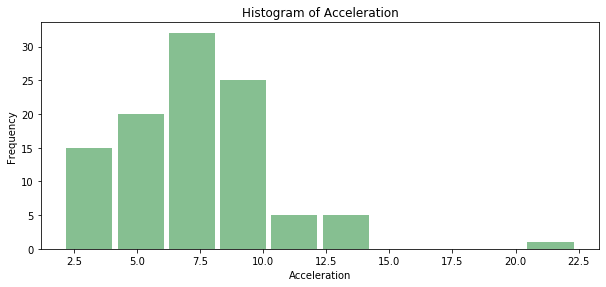

In [7]:
hist=df.hist(column='AccelSec',color='#86bf91',bins=10, grid=False, figsize=(10,15), layout=(3,1), sharex=True,zorder=2, rwidth=0.9)
for hi in hist.flatten():
    hi.set_title("Histogram of Acceleration")
    hi.set_xlabel("Acceleration")
    hi.set_ylabel("Frequency")
    

Text(0, 0.5, 'PriceEuro')

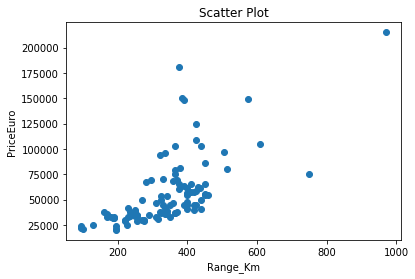

In [8]:
#create a scatter plot of range and price
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['Range_Km'], df['PriceEuro'])
# set a title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('Range_Km')
ax.set_ylabel('PriceEuro')


In [9]:
df['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
SPV           3
Cabrio        3
Station       1
MPV           1
Name: BodyStyle, dtype: int64

In [10]:
df['RapidCharge'].value_counts()

Yes    98
No      5
Name: RapidCharge, dtype: int64

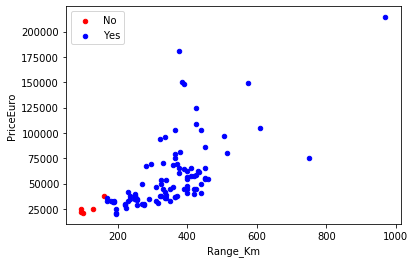

In [11]:
fig, ax = plt.subplots()

colors = {'Yes':'b', 'No':'r'}

grouped = df.groupby('RapidCharge')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Range_Km', y='PriceEuro', label=key, color=colors[key])

plt.show()

In [71]:
#compute pairwise pearson correlations of the columns to returnn a correlation matrix
corr =df.corr()
df.corr(method='pearson',min_periods=1)



,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.396705
PriceEuro,-0.627174,0.829057,0.674844,0.396705,1.000000
